In [1]:
%autosave 60

Autosaving every 60 seconds


# Video Games Sales Dataset

## Link : https://www.kaggle.com/gregorut/videogamesales

This dataset contains a list of video games __with sales greater than 100,000 copies.__ It was generated by a scrape of vgchartz.com.

Fields include  
__Rank__ - Ranking of overall sales  
__Name__ - The games name  
__Platform__ - Platform of the games release (i.e. PC,PS4, etc.)  
__Year__ - Year of the game's release  
__Genre__ - Genre of the game   
__Publisher__ - Publisher of the game  
__NA_Sales__ - Sales in North America (in millions)  
__EU_Sales__ - Sales in Europe (in millions)  
__JP_Sales__ - Sales in Japan (in millions)  
__Other_Sales__ - Sales in the rest of the world (in millions)  
__Global_Sales__ - Total worldwide sales.  


There are __16,598 records.__ 2 records were dropped due to incomplete information.

## Set-up (import, load dataset)

In [4]:
# Import of the main modules

import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [5]:
# Load the dataset

GamesSales = pd.read_csv("Datasets/vgsales.csv",sep=",")

### Exploring the data

In [6]:
GamesSales.count()

Rank            16598
Name            16598
Platform        16598
Year            16327
Genre           16598
Publisher       16540
NA_Sales        16598
EU_Sales        16598
JP_Sales        16598
Other_Sales     16598
Global_Sales    16598
dtype: int64

In [13]:
# All the platform of the dataset 
GamesSales['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [14]:
# All the Genre of the dataset
GamesSales['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [16]:
# All the publisher of the dataset
GamesSales['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       nan, 'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',


__________________________________________________________________

## 5 Questions to ask the dataset

### Question 1) Which platform released the most distinct games ?

In [25]:
# We take the number of each appearance of a Platform, then we keep only the first one
GamesSales['Platform'].value_counts()[:1]

DS    2163
Name: Platform, dtype: int64

=> The answer is the DS

### Question 2) Which Publisher sold the most copies ?

In [72]:
# We group the games by publishers then we add the global sales by publisher to then extract only the highest one
GamesSales.groupby("Publisher").Global_Sales.sum().sort_values()[-2:] # (asking the first two to compare the difference)

Publisher
Electronic Arts    1110.32
Nintendo           1786.56
Name: Global_Sales, dtype: float64

=> The answer is Nintendo with 1.787 Billion copies (with an advance of around 0.670 on the second place !)


### Question 3) Where did *a Publisher* sold most copies ? 

In [90]:
def where_sold(publisher):
    list_published = GamesSales[GamesSales.Publisher==publisher]
    places_where_sold = {"NA":0,"EU":0,"JP":0,"OP":0}
    for index, row in list_published.iterrows():
        places_where_sold["NA"] = places_where_sold["NA"] + row.NA_Sales
        places_where_sold["EU"] = places_where_sold["EU"] + row.EU_Sales
        places_where_sold["JP"] = places_where_sold["JP"] + row.JP_Sales
        places_where_sold["OP"] = places_where_sold["OP"] + row.Other_Sales
    
    print(places_where_sold)
    return max(places_where_sold, key=places_where_sold.get)

In [91]:
where_sold("Nintendo")

{'NA': 816.8700000000001, 'EU': 418.7400000000002, 'JP': 455.4199999999995, 'OP': 95.33000000000038}


'NA'

=> Nintendo sold most of its copies of video games to North America (almost twice as in the Europe or in Japan)

### Question 4) Which genre is the most popular in *a World Region* ? 

In [101]:
# the region are NA, EU, JP and Other


print("Most popular genre in North America : ")
print(GamesSales.groupby("Genre").NA_Sales.sum().sort_values()[-1:])

print("Most popular genre in Europe : ")
print(GamesSales.groupby("Genre").EU_Sales.sum().sort_values()[-1:])

print("Most popular genre in Japan : ")
print(GamesSales.groupby("Genre").JP_Sales.sum().sort_values()[-1:])

print("Most popular genre in Other Places : ")
print(GamesSales.groupby("Genre").Other_Sales.sum().sort_values()[-1:])

Most popular genre in North America : 
Genre
Action    877.83
Name: NA_Sales, dtype: float64
Most popular genre in Europe : 
Genre
Action    525.0
Name: EU_Sales, dtype: float64
Most popular genre in Japan : 
Genre
Role-Playing    352.31
Name: JP_Sales, dtype: float64
Most popular genre in Other Places : 
Genre
Action    187.38
Name: Other_Sales, dtype: float64


### Question 5) Which year saw the most games released ?

In [106]:
GamesSales.groupby("Year").Global_Sales.sum().sort_values()

Year
2017.0      0.05
2020.0      0.29
1980.0     11.38
1983.0     16.79
1987.0     21.74
1982.0     28.86
1991.0     32.23
1981.0     35.77
1986.0     37.07
1993.0     45.98
1988.0     47.22
1990.0     49.39
1984.0     50.36
1985.0     53.94
2016.0     70.93
1989.0     73.45
1992.0     76.16
1994.0     79.17
1995.0     88.11
1996.0    199.15
1997.0    200.98
2000.0    201.56
1999.0    251.27
1998.0    256.47
2015.0    264.44
2001.0    331.47
2014.0    337.05
2003.0    357.85
2012.0    363.54
2013.0    368.11
2002.0    395.52
2004.0    419.31
2005.0    459.94
2011.0    515.99
2006.0    521.04
2010.0    600.45
2007.0    611.13
2009.0    667.30
2008.0    678.90
Name: Global_Sales, dtype: float64

=> The year with the most sales is 2008. But it might be because the scrapping is incomplete for the latest years.

## 5 Graphics about the dataset

In [112]:
# I'll only use the data before 2010 as after this year the data seems not as accurate since most of them did not 
# last long enough to reach the treshold of 100 000 sales
GamesSales2 = GamesSales[GamesSales['Year'] < 2010]

### Graph 1) The evolution of Electronic Arts sales

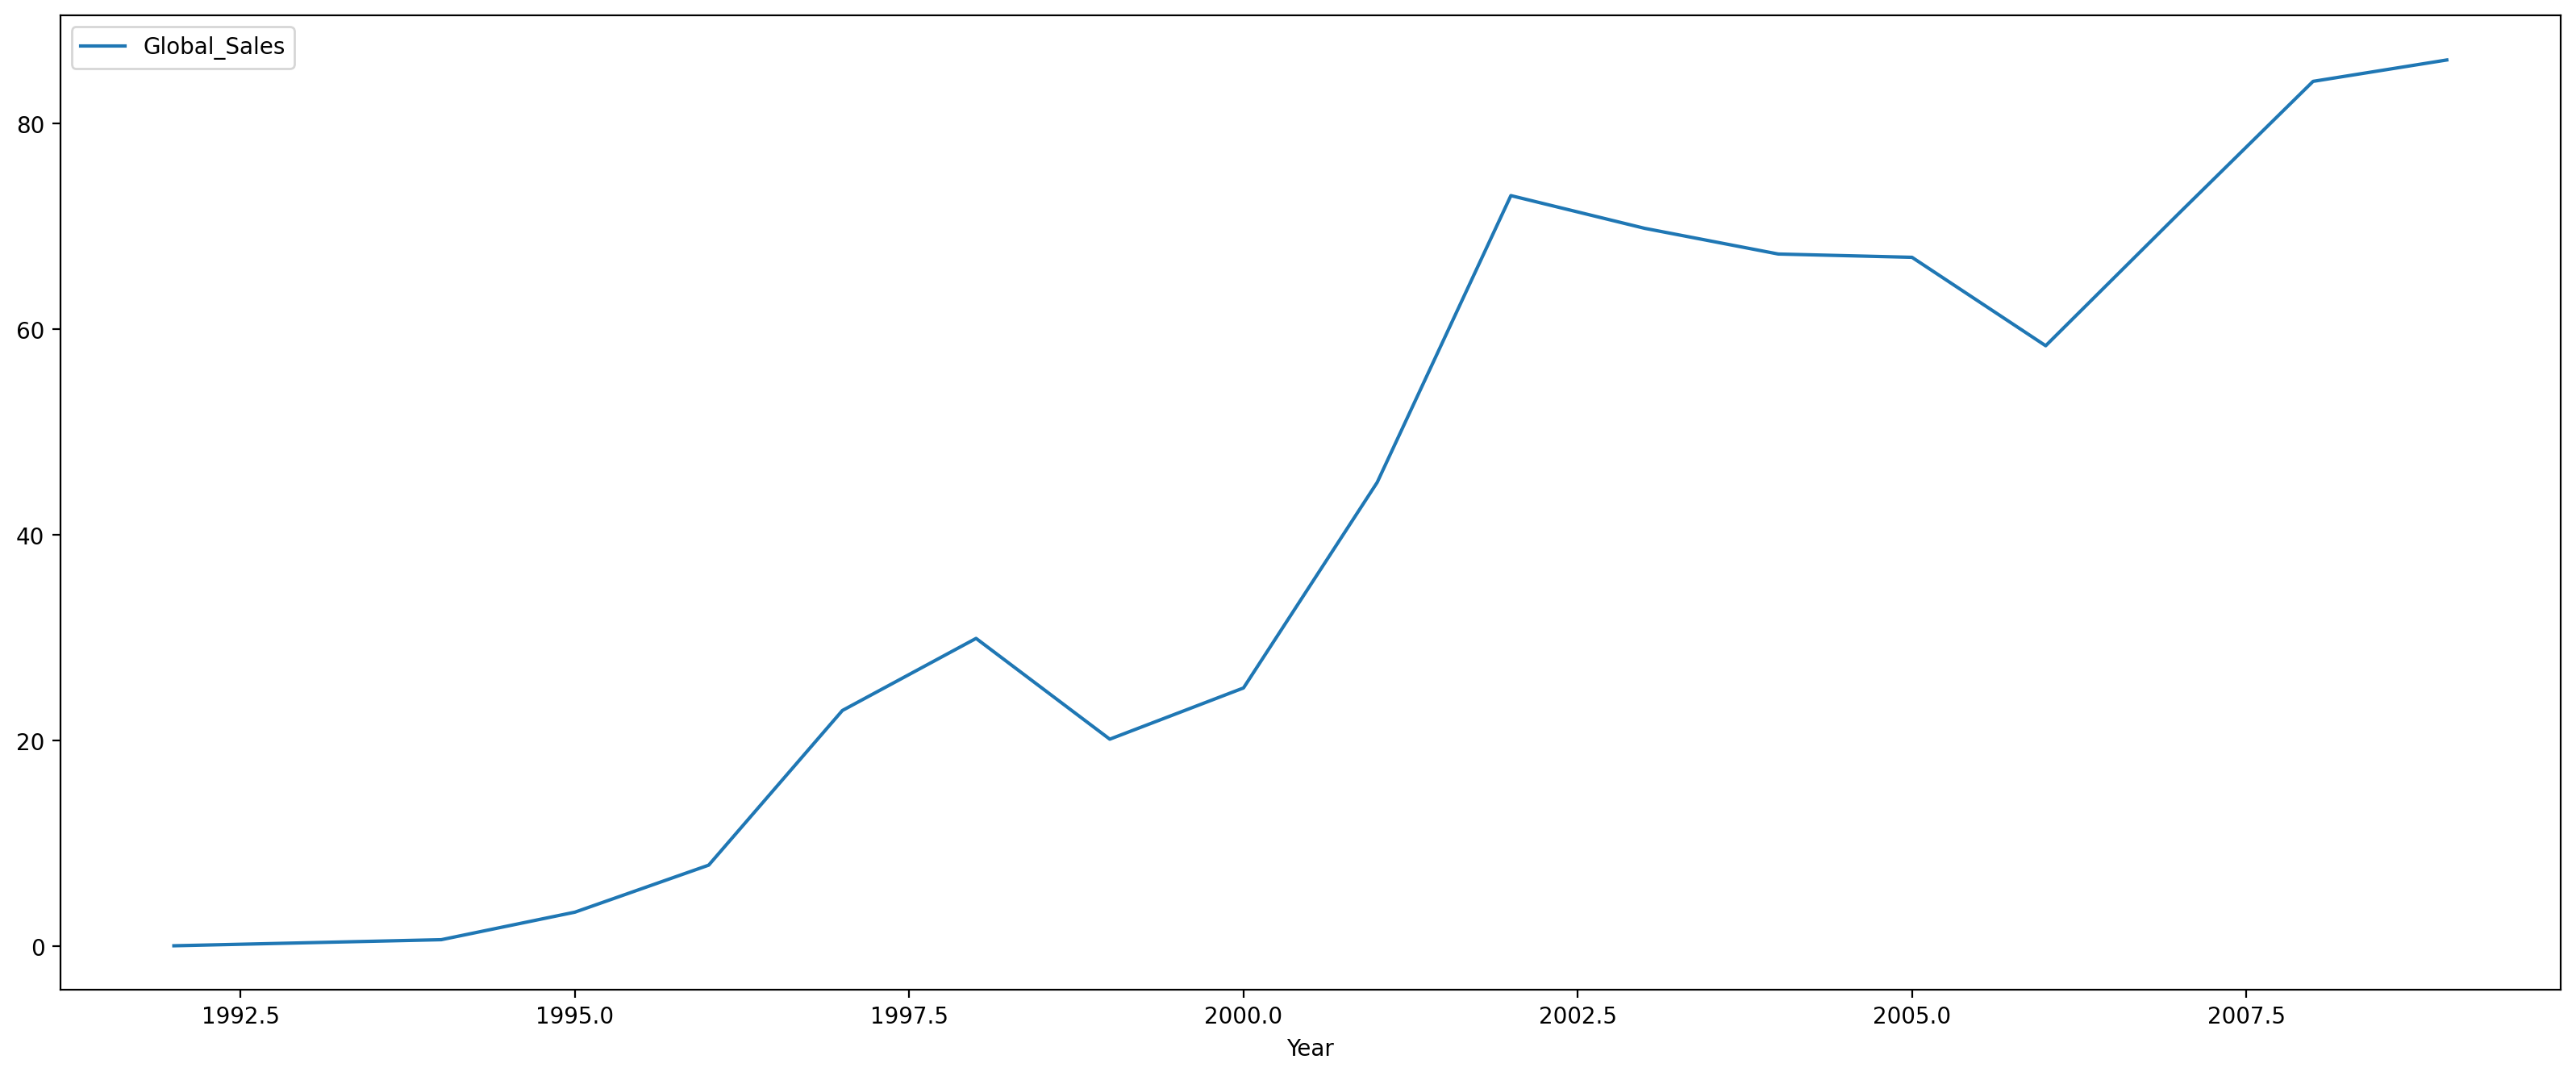

In [194]:
GamesSales2[(GamesSales2.Publisher=="Electronic Arts")].groupby("Year").Global_Sales.sum().plot(legend=True)

=> The general trend is that the sales of EA games keeps growing through the year. 

### Graph 2) Comparing the number of games released by genre though the years

In [120]:
total_genre = GamesSales2.pivot_table('Global_Sales', index="Year", columns='Genre',aggfunc=sum)

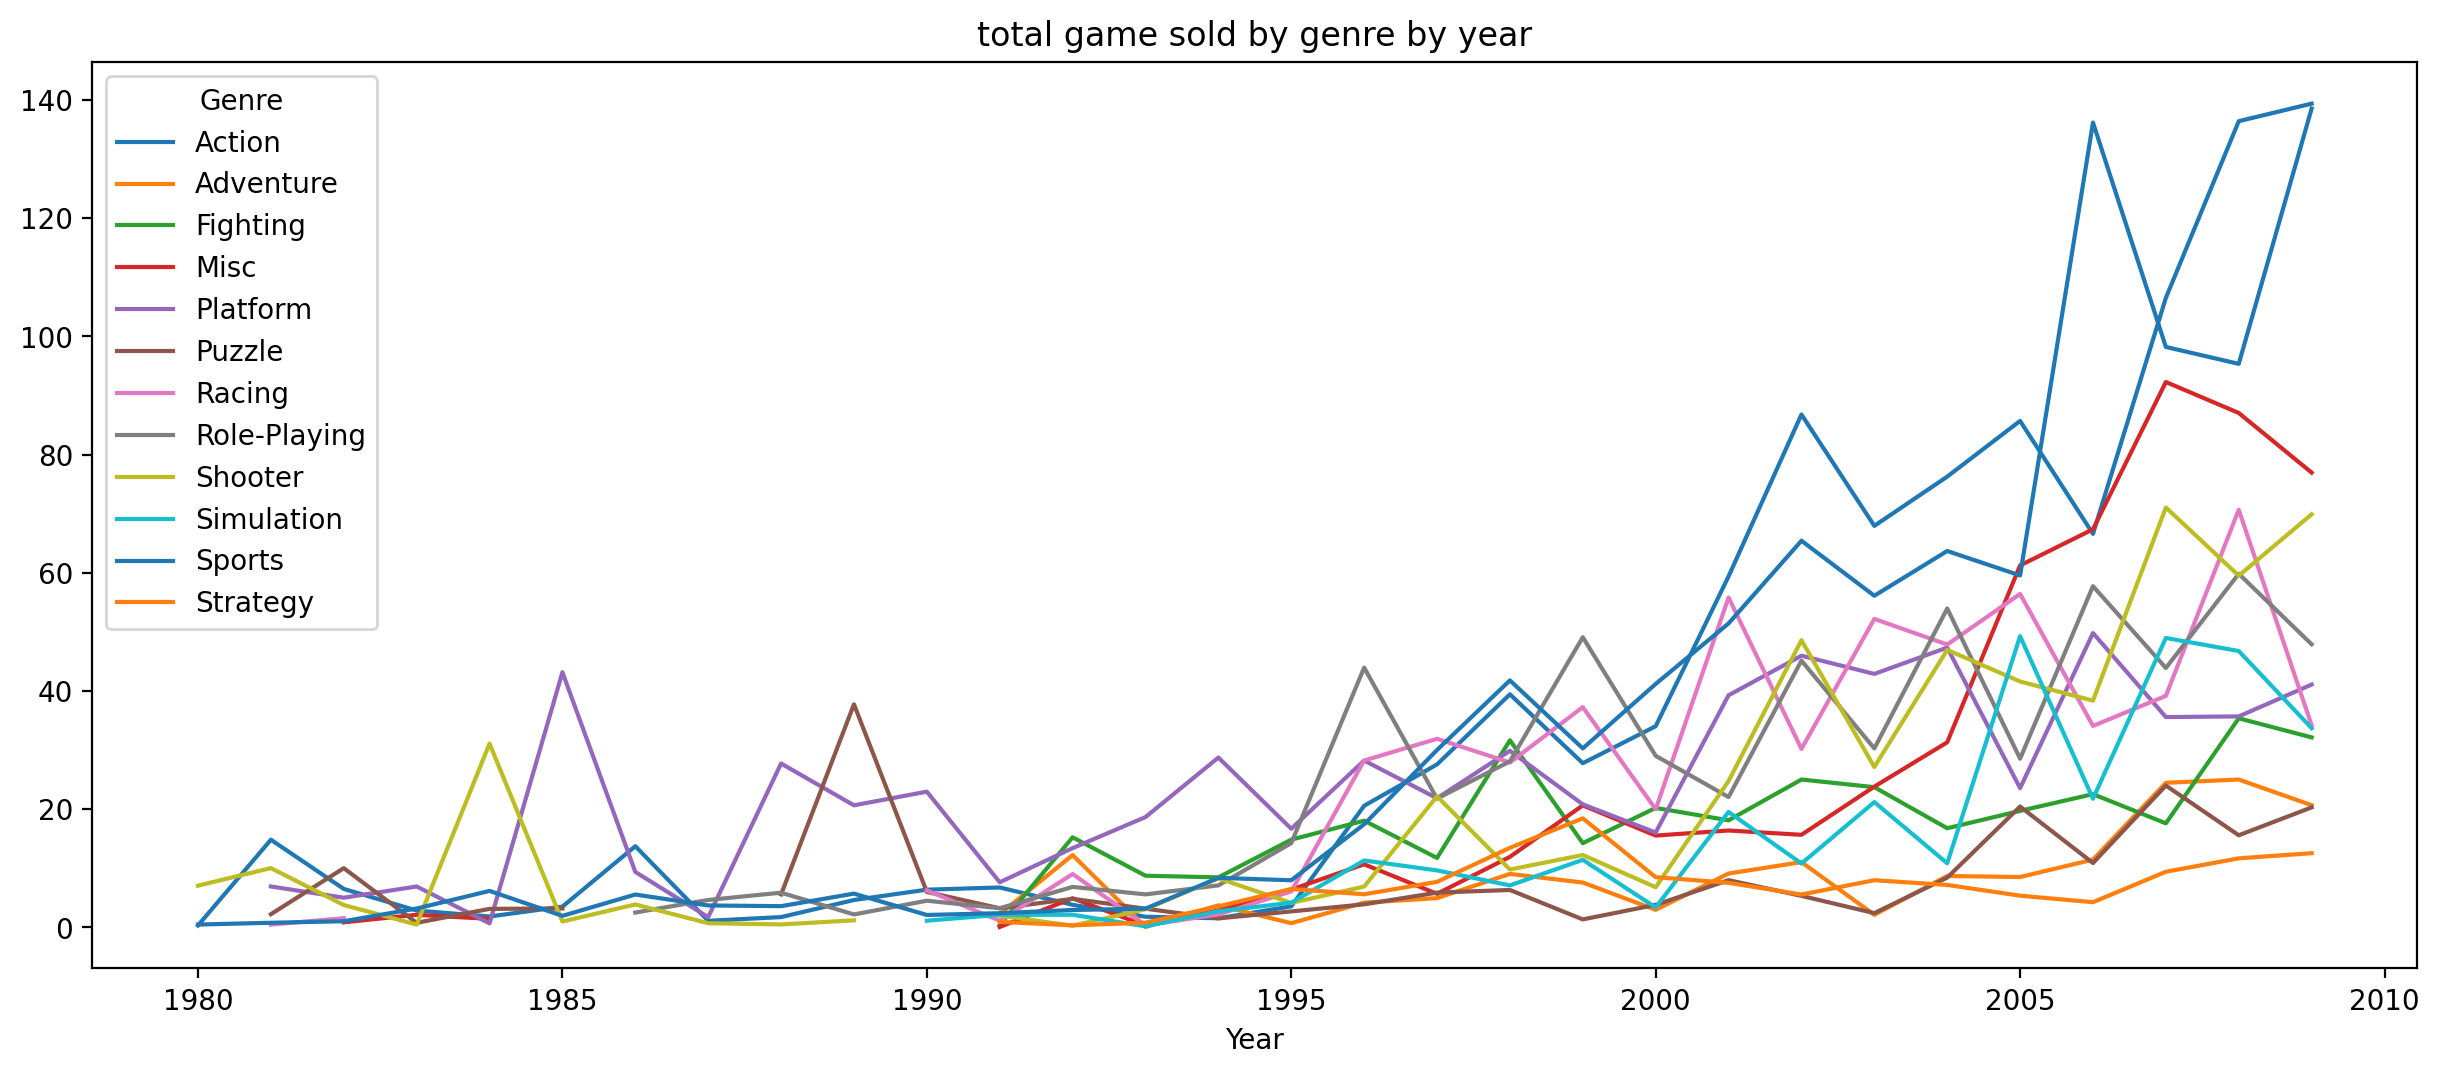

In [121]:
plt.rcParams['figure.figsize'] = [15, 6] # Taille du graphique en pouces
plt.rcParams['figure.dpi'] = 200 # résolution en points par pouce
total_genre.plot(title="total game sold by genre by year")

The two genres that are sold the most around 2010 are Sports and Action.

### Graph 3) Games sold by year release for each Platform

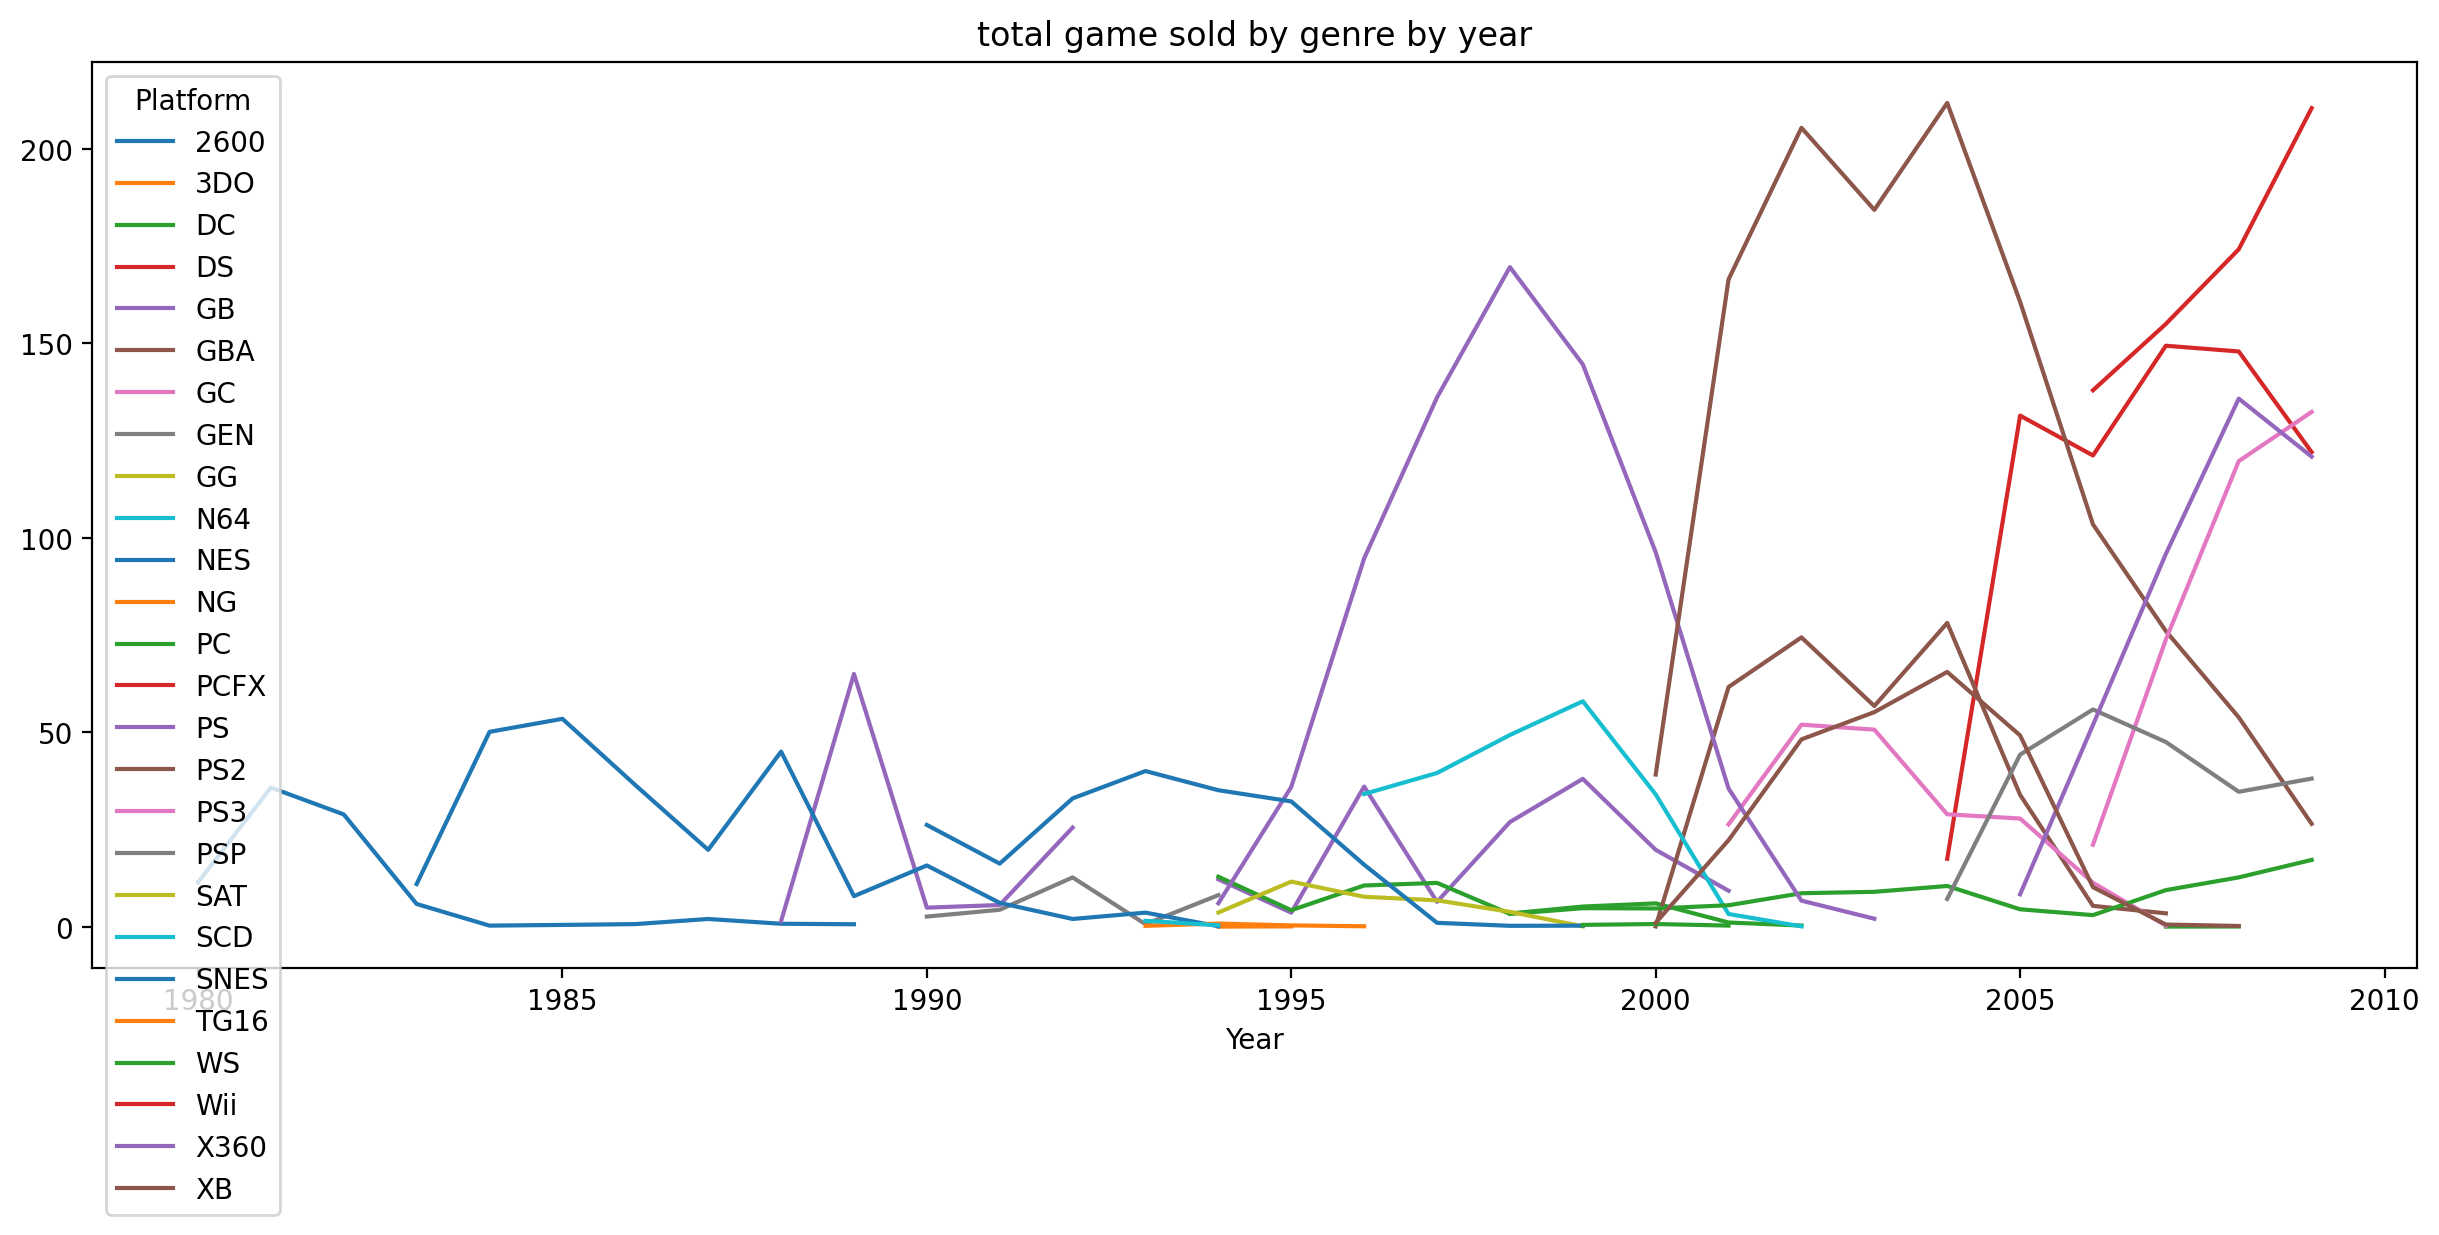

In [122]:
total_platform = GamesSales2.pivot_table('Global_Sales', index="Year", columns='Platform',aggfunc=sum)
total_platform.plot(title="total game sold by platform by year")

### Graph 4) Histograme of game sold by platform

In [132]:
platform = GamesSales2.groupby("Platform").Global_Sales.sum().sort_values()


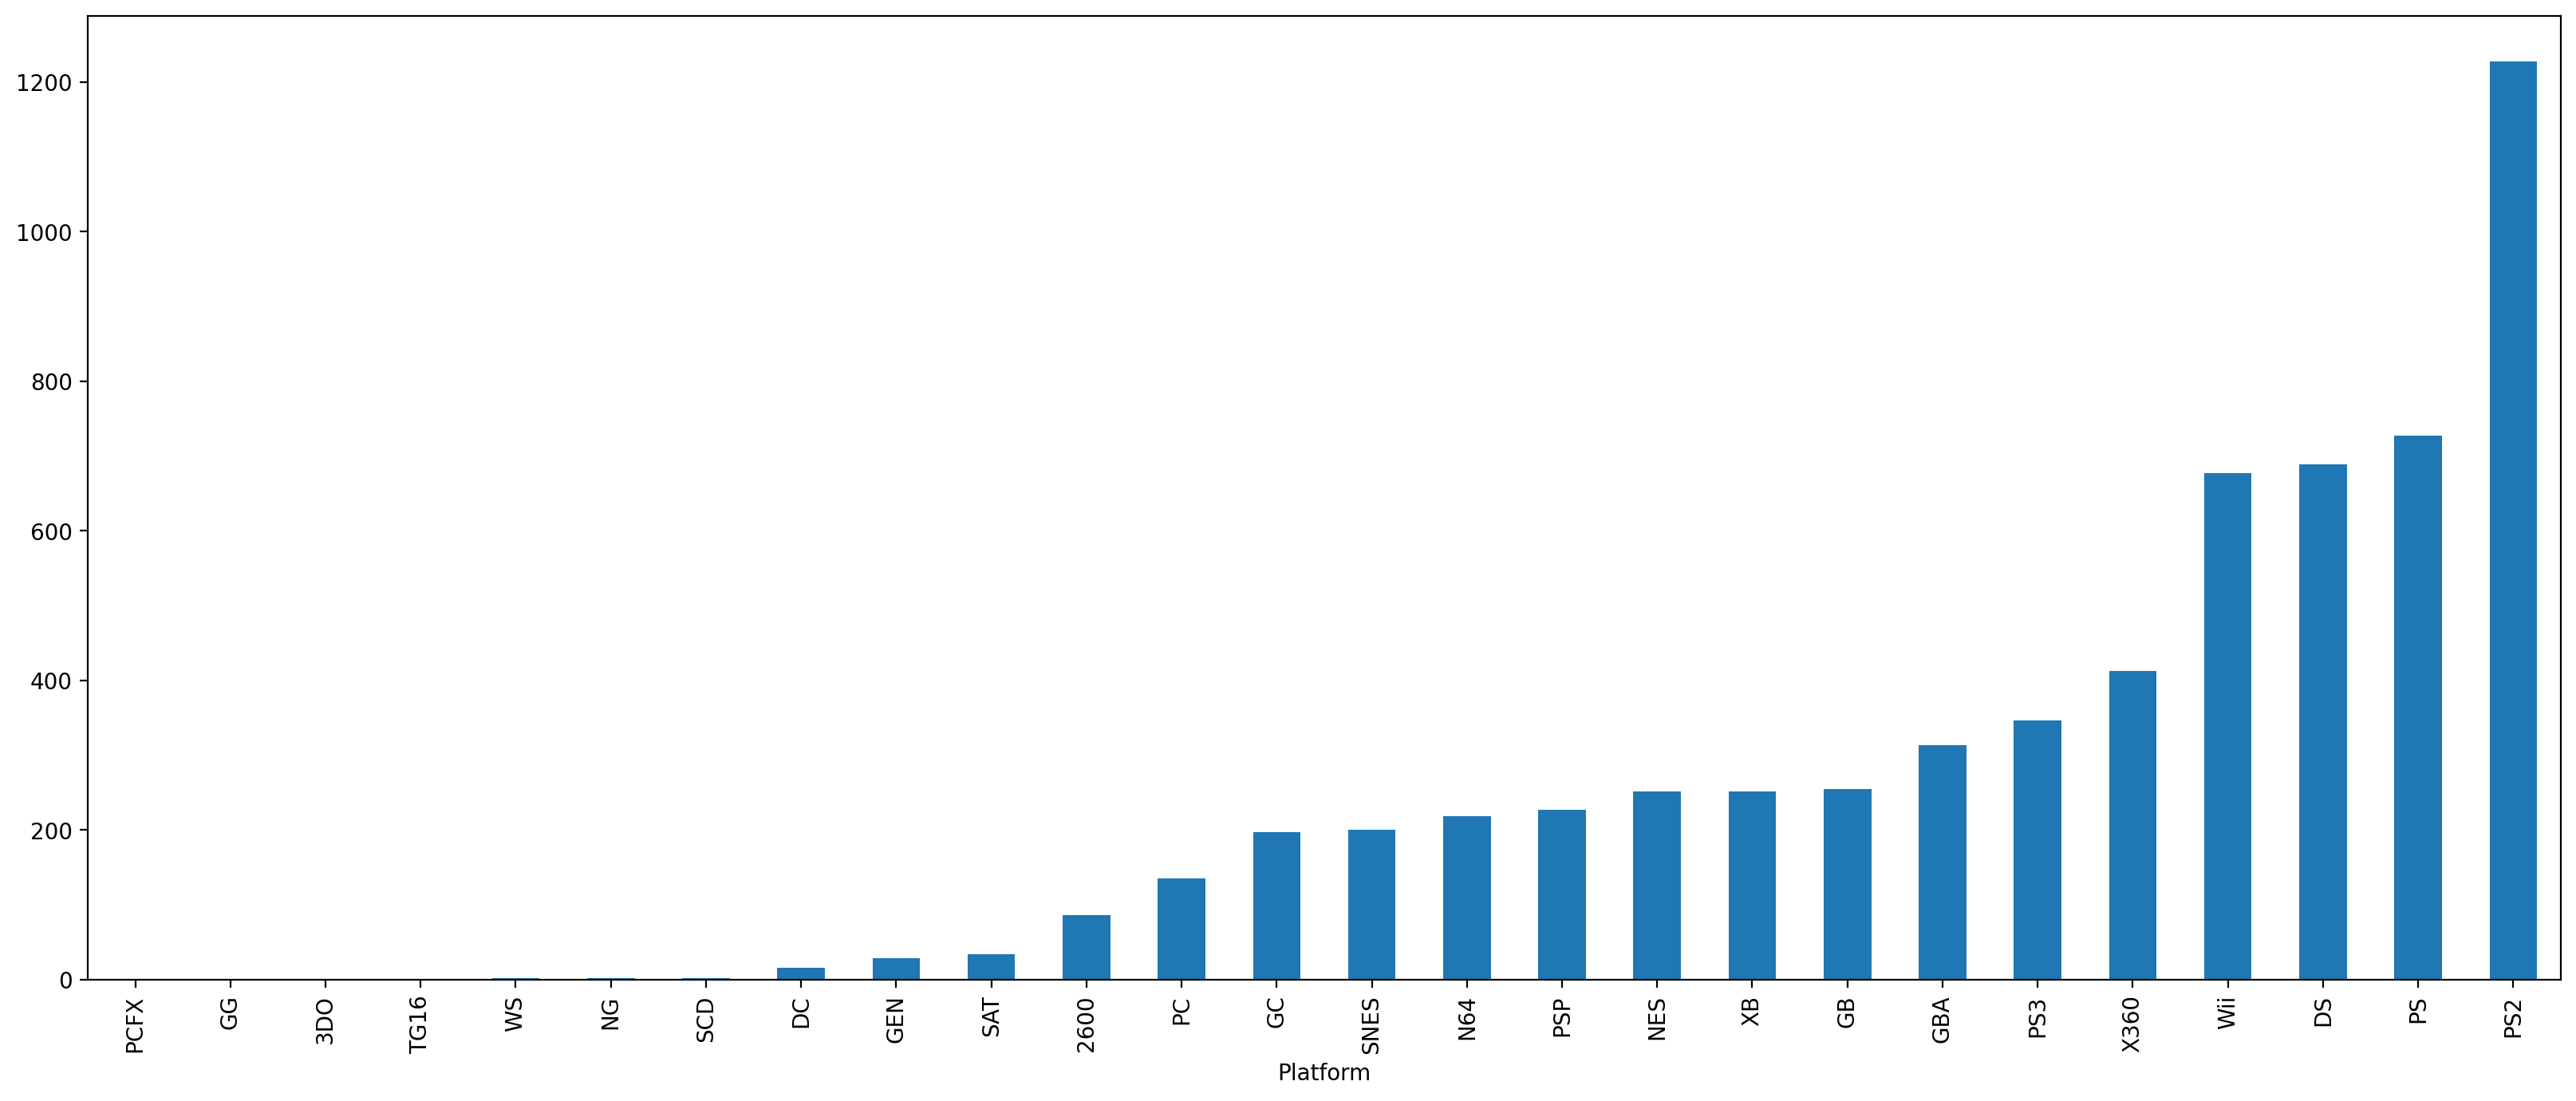

In [193]:
platform.plot.bar()

=> The PS2 is the Platform who saw the most sales overall.

### Graph 5) Evolution of sales by region

In [161]:
data_EU = GamesSales2[['Year','EU_Sales']].sort_values(by='Year').copy().dropna()

In [162]:
data_NA = GamesSales2[['Year','NA_Sales']].sort_values(by='Year').copy().dropna()

In [163]:
data_JP = GamesSales2[['Year','JP_Sales']].sort_values(by='Year').copy().dropna()

In [164]:
data_Other = GamesSales2[['Year','Other_Sales']].sort_values(by='Year').copy().dropna()

In [166]:
data_EU_perYear = data_EU.groupby("Year").EU_Sales.sum()

In [168]:
data_NA_perYear = data_NA.groupby("Year").NA_Sales.sum()

In [169]:
data_JP_perYear = data_JP.groupby("Year").JP_Sales.sum()

In [171]:
data_Other_perYear = data_Other.groupby("Year").Other_Sales.sum()

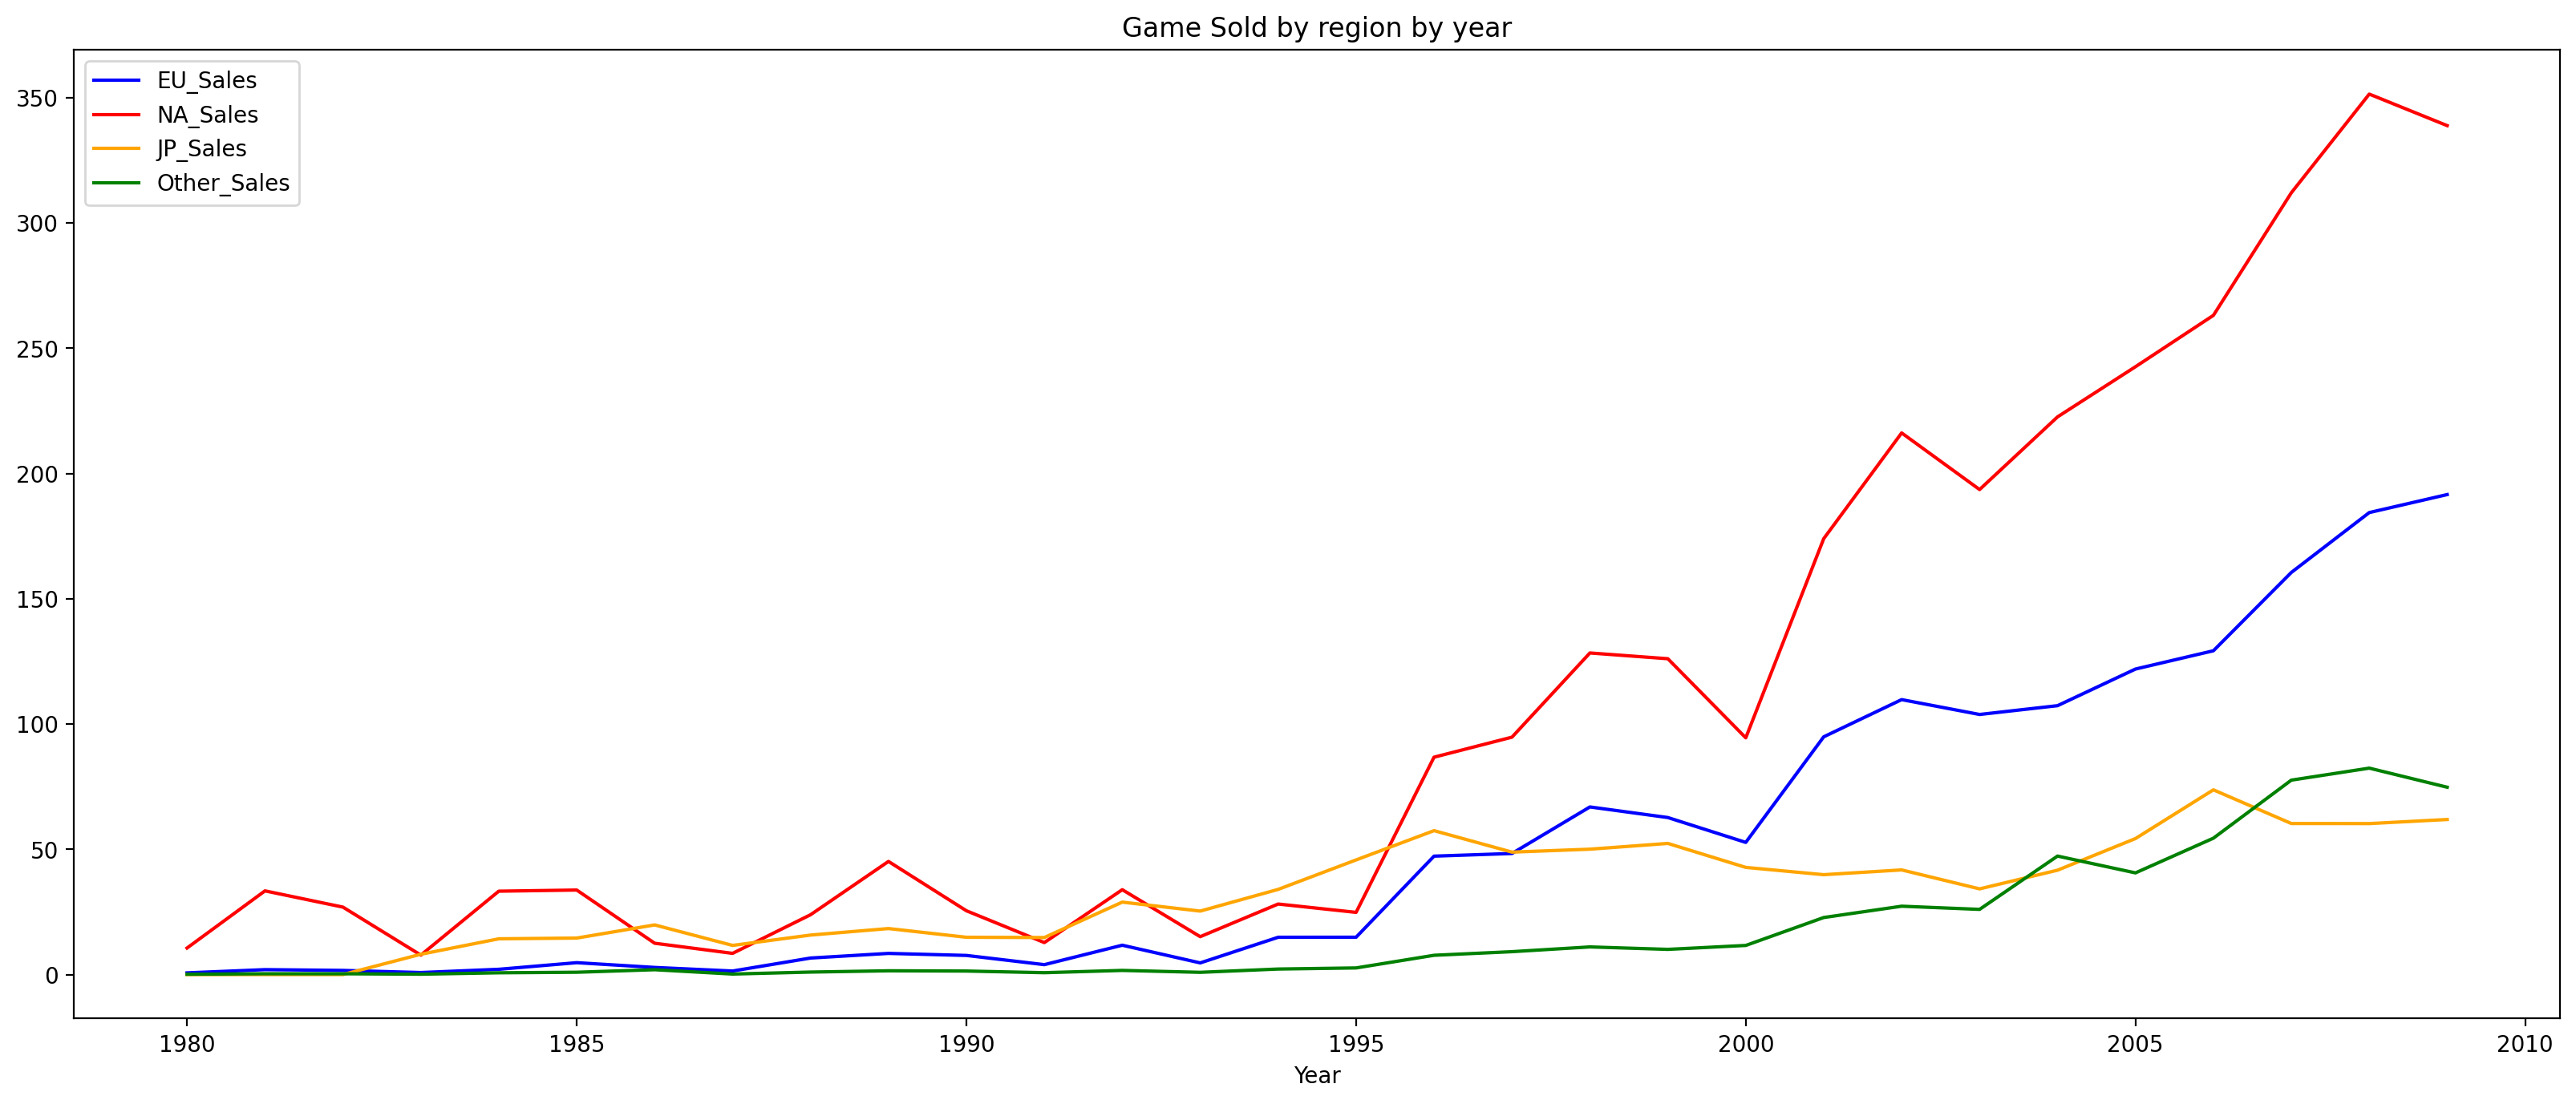

In [197]:
plt.rcParams['figure.figsize'] = [20, 8] # Taille du graphique en pouces
plt.rcParams['figure.dpi'] = 200 # résolution en points par pouce

ax = data_EU_perYear.plot(x='Year',y='Number Sold',title='Game Sold by region by year',color='blue',legend=True)
data_NA_perYear.plot(ax=ax,label='NA_Sales',color='red',legend=True)
data_JP_perYear.plot(ax=ax,color='orange',legend=True)
data_Other_perYear.plot(ax=ax,color='green',legend=True)

=> The region with the highest sales is North America.